


# **OVARIAN CANCER CLASSIFICATION USING DEEP LEARNING**



**INTRODUCTION**

Ovarian carcinoma, the deadliest cancer of the female reproductive system, encompasses a spectrum of distinct subtypes, each with unique characteristics. Accurate identification of these subtypes is crucial for tailoring effective treatment plans. However, the current reliance on pathologists for diagnosis poses challenges in terms of consistency and accessibility, especially in underserved communities. Leveraging data science offers a promising avenue to revolutionize ovarian cancer diagnosis and address these critical issues. This brief explores the potential of data-driven solutions in improving subtype identification and subsequently advancing personalized treatment strategies for ovarian carcinoma.

In [ ]:
!python -m pip install --upgrade pip


# Install the Kaggle library
!pip install -q kaggle




In [ ]:
from ipywidgets import FileUpload
upload_button = FileUpload()
upload_button


FileUpload(value=(), description='Upload')

In [ ]:
# Check if the file has been uploaded
if upload_button.value:
    # Get the uploaded file content
    file_content = upload_button.value[0]['content']
    # Write the content to a file named kaggle.json
    with open('kaggle.json', 'wb') as f:
        f.write(file_content)
    print("File uploaded successfully.")
else:
    print("Please upload a file.")


File uploaded successfully.


In [ ]:
import os

# Check if kaggle.json exists in the current directory
if not os.path.exists("kaggle.json"):
    print("Error: 'kaggle.json' file not found in the current directory.")
else:
    # Create the .kaggle directory if it doesn't exist
    kaggle_dir = os.path.expanduser("~/.kaggle")
    if not os.path.exists(kaggle_dir):
        os.makedirs(kaggle_dir)

    # Check if the file already exists in the target directory
    target_file = os.path.join(kaggle_dir, "kaggle.json")
    if os.path.exists(target_file):
        # If the file already exists, delete it to avoid conflicts
        os.remove(target_file)

    # Move the API key file to the required directory
    os.rename("kaggle.json", target_file)


In [ ]:
import os

# Set permissions
kaggle_json_path = os.path.join(os.path.expanduser("~/.kaggle"), "kaggle.json")
os.chmod(kaggle_json_path, 0o600)  # Sets permissions to 600 (read and write for owner only)


In [ ]:
!kaggle datasets download -d jirkaborovec/tiles-of-ovarian-cancer-subtype


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


**IMPORTING LIBRARIES**

In [ ]:
pip install colorama


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install seaborn --user


In [ ]:
!pip install seaborn



In [ ]:
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import math

rc = {
    "axes.facecolor": "#ffaaa5",
    "figure.facecolor": "#ffaaa5",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

**LOADING DATASETS**

**DATASET OVERVIEW**

The dataset comprises images related to ovarian carcinoma, categorized into two main types: whole slide images (WSI) and tissue microarray (TMA). WSI images are captured at a 20x magnification, potentially yielding large file sizes. TMAs, on the other hand, are smaller in dimensions (approximately 4,000x4,000 pixels) but at a higher 40x magnification.

In the test set, images originate from different source hospitals compared to the training set. Notably, some of the test set's largest images are substantial, with dimensions nearing 100,000 x 50,000 pixels. It's essential to be prepared for diverse scenarios, including variations in image dimensions, quality, staining techniques, and more.

The test set consists of approximately 2,000 images, with the majority being TMAs. The overall dataset size is substantial, totaling 550 GB. Loading the data will require significant time and resources.

Please note that a few of the largest test set images may not entirely fit into memory on a notebook equipped with a GPU. A solution is under investigation, with updates expected around the week of October 18th.

CSV Files: For the train and test sets, accompanying CSV files provide crucial labels and information:

image_id: A unique identifier for each image. label: The target class indicating subtypes of ovarian cancer, such as CC, EC, HGSC, LGSC, MC, or Other. Notably, the "Other" class is exclusive to the test set, highlighting the challenge of identifying outliers. image_width: The width of the image in pixels. image_height: The height of the image in pixels. is_tma: A binary value indicating whether the slide is a tissue microarray. This information is only available for the train set.

Additionally, the dataset includes a folder named [train/test]_thumbnails containing smaller .png versions of the whole slide images. Thumbnails, however, are not provided for TMAs.

In [ ]:
!pip install pandas



In [ ]:
# Load the dataset into a DataFrame
import pandas as pd
train_df = pd.read_csv('train.csv')

In [ ]:
train_df.head().style.set_properties(**{'background-color':'green','color':'white','border-color':'#8b8c8c'})

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False


**A brief descriptions of each subtype of ovarian carcinoma:**

**CC (Clear Cell Carcinoma):** Clear Cell Carcinoma is a type of ovarian cancer characterized by cells that appear clear under a microscope.

**EC (Endometrioid Carcinoma):**Endometrioid Carcinoma is a type of ovarian cancer that resembles the tissue lining the uterus (endometrium).

**HGSC (High-Grade Serous Carcinoma):** High-Grade Serous Carcinoma is an aggressive form of ovarian cancer that is typically diagnosed at an advanced stage.

**LGSC (Low-Grade Serous Carcinoma):** Low-Grade Serous Carcinoma is a less aggressive form of ovarian cancer, often diagnosed at an earlier stage.

**MC (Mucinous Carcinoma):** Mucinous Carcinoma is a type of ovarian cancer that arises from cells that produce mucus.







In [ ]:
# Load the dataset into a DataFrame
import pandas as pd
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.head().style.set_properties(**{'background-color':'lightgreen','color':'black','border-color':'#8b8c8c'})


,image_id,image_width,image_height
0,41,28469,16987


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      538 non-null    int64 
 1   label         538 non-null    object
 2   image_width   538 non-null    int64 
 3   image_height  538 non-null    int64 
 4   is_tma        538 non-null    bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 17.5+ KB


In [ ]:
train_df.describe()

,image_id,image_width,image_height
count,538.000000,538.000000,538.000000
mean,32194.340149,48859.533457,29729.460967
std,18774.950592,20040.989927,10762.899796
min,4.000000,2964.000000,2964.000000
25%,15881.250000,34509.000000,22089.500000
50%,32152.000000,48160.000000,29732.000000
75%,47892.500000,64143.750000,37880.750000
max,65533.000000,105763.000000,50155.000000


In [ ]:
train_df['label'].value_counts()

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

**DESCRIPTIVE STATISTICS**

In [ ]:
# Summary statistics for relevant variables
styled_data = train_df.describe().style\
.background_gradient(cmap='summer')\
.set_properties(**{'text-align':'center','border':'1px solid black'})

# display styled data
display(styled_data)

,image_id,image_width,image_height
count,538.000000,538.000000,538.000000
mean,32194.340149,48859.533457,29729.460967
std,18774.950592,20040.989927,10762.899796
min,4.000000,2964.000000,2964.000000
25%,15881.250000,34509.000000,22089.500000
50%,32152.000000,48160.000000,29732.000000
75%,47892.500000,64143.750000,37880.750000
max,65533.000000,105763.000000,50155.000000


**EXPLORATORY DATA ANALYSIS(EDA)**

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64
is_tma
False    513
True      25
Name: count, dtype: int64
              image_width  image_height
image_width      1.000000      0.524395
image_height     0.524395      1.000000


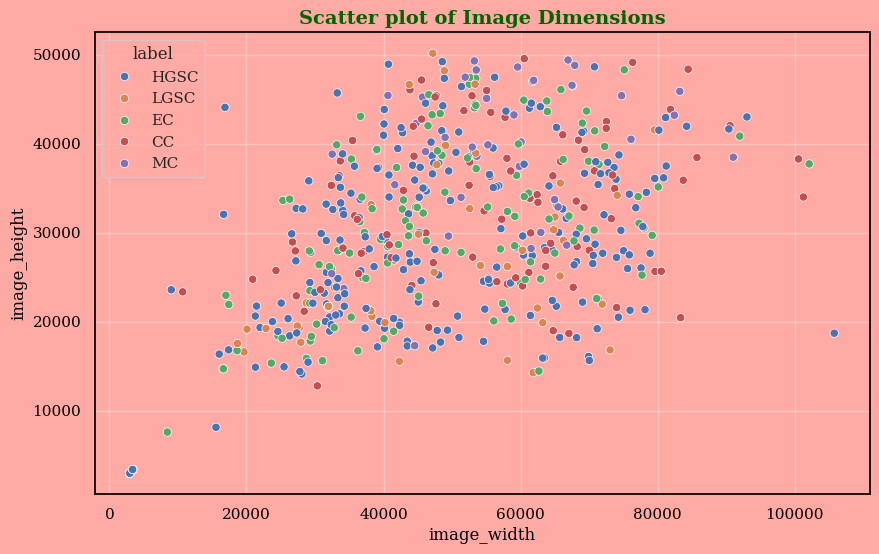

In [ ]:
# Class Distribution
class_distribution = train_df['label'].value_counts()
print(class_distribution)

# TMA Distribution
tma_distribution = train_df['is_tma'].value_counts()
print(tma_distribution)

# Correlation between Image Dimensions
correlation = train_df[['image_width', 'image_height']].corr()
print(correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='image_width', y='image_height', data=train_df, hue='label')
plt.title('Scatter plot of Image Dimensions', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Scatter plot of Image Dimensions.png')
plt.show()

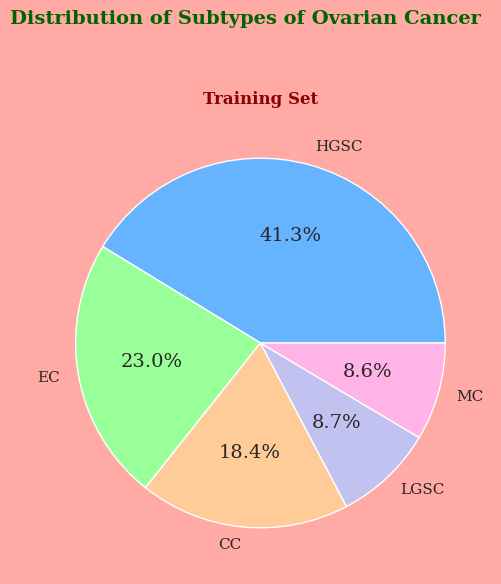

In [ ]:
HGSC = train_df[train_df['label']=="HGSC"]
EC = train_df[train_df['label']=="EC"]
CC = train_df[train_df['label']=="CC"]
LGSC = train_df[train_df['label']=="LGSC"]
MC = train_df[train_df['label']=="MC"]

# set the figure size and font size
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 14

# set the colors (I've selected a nice color scheme)
colors = ['#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#ffb3e6']

# plot the pie chart for the training set
plt.subplot(1, 1, 1)
plt.pie([len(HGSC), len(EC), len(CC), len(LGSC), len(MC)], labels=['HGSC', 'EC', 'CC', 'LGSC', 'MC'], autopct='%1.1f%%', colors=colors)
plt.title('Training Set', fontsize = 12, fontweight = 'bold', color = 'darkred')

plt.suptitle('Distribution of Subtypes of Ovarian Cancer', fontsize=14,fontweight = 'bold', color = 'darkgreen', y=1.05)

plt.savefig('Distribution of Subtypes of Ovarian Cancer.png')


# Show the plot
plt.show()


A pie chart visualizing the distribution of different subtypes of ovarian cancer based on the data provided in the train DataFrame. Each slice represents a subtype, and the chart displays the relative proportions of each subtype in the dataset.

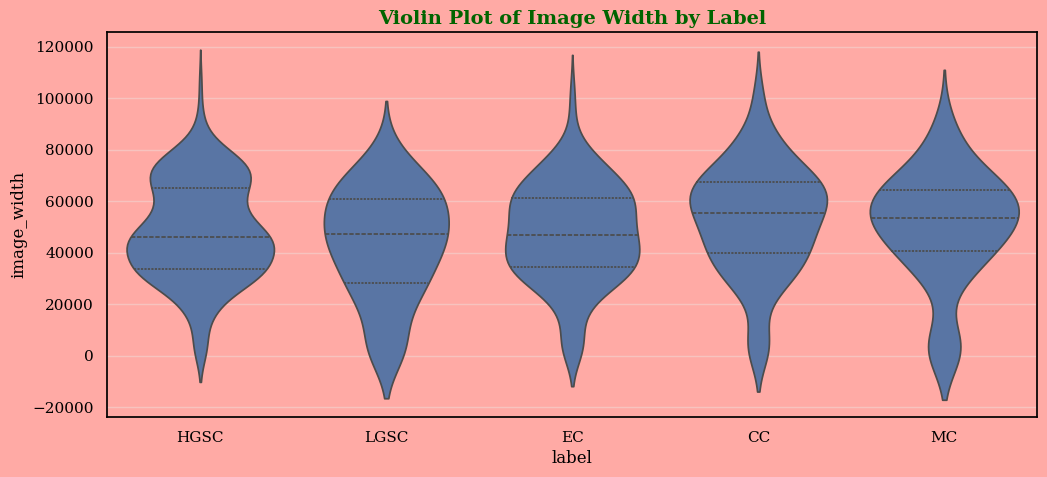

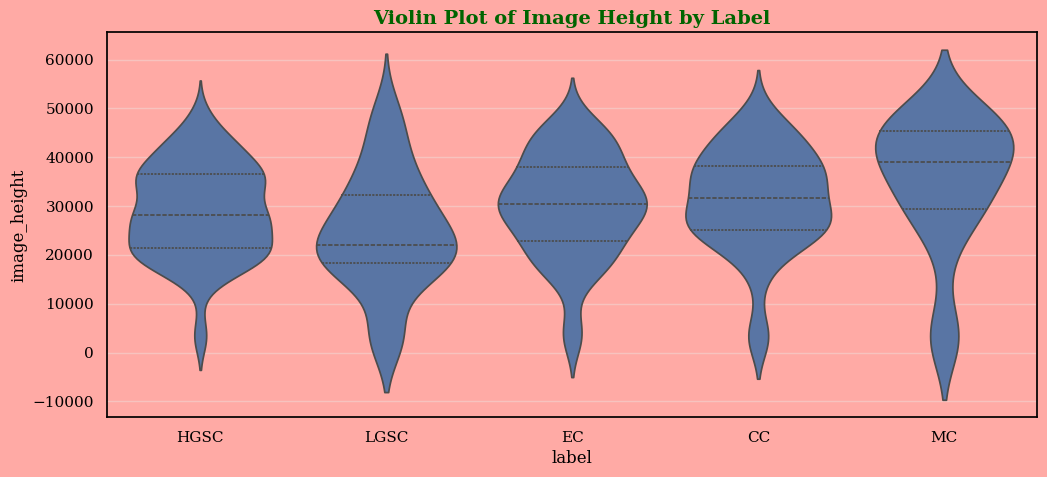

In [ ]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='label', y='image_width', data=train_df, inner='quartile')
plt.title('Violin Plot of Image Width by Label', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Violin Plot of Image Width by Label.png')
plt.show()

plt.figure(figsize=(12, 5))
sns.violinplot(x='label', y='image_height', data=train_df, inner='quartile')
plt.title('Violin Plot of Image Height by Label', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Violin Plot of Image Height by Label.png')
plt.show()

These plots provide visual representations of the distribution of image widths and heights across different labels (potentially related to subtypes of ovarian cancer). Violin plots are particularly useful for showing the distribution and density of the data, and the quartile lines inside the "violin" give additional information about the data's central tendency and spread.

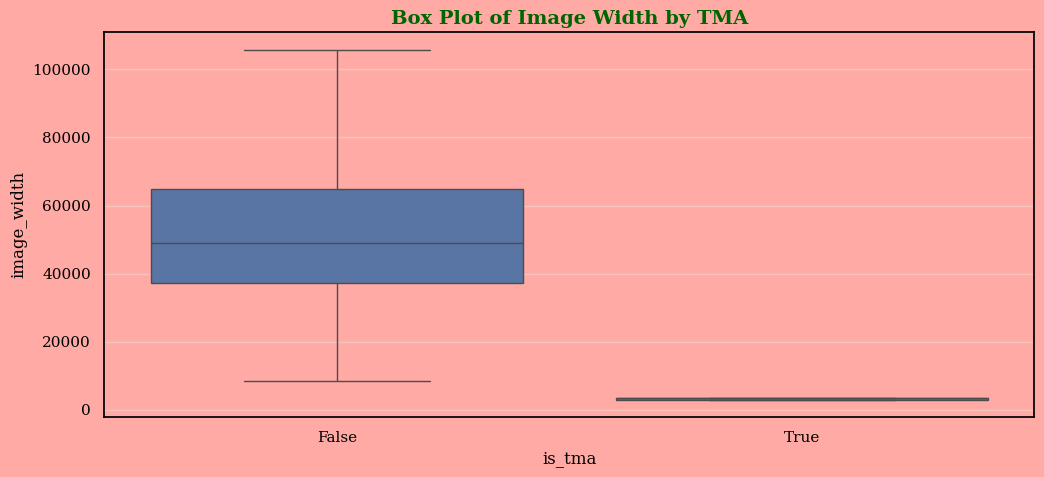

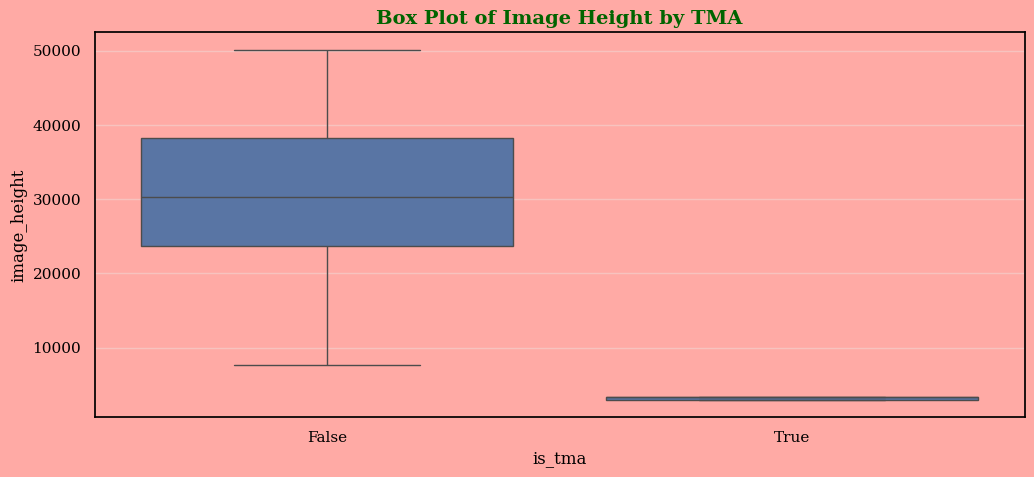

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='is_tma', y='image_width', data=train_df)
plt.title('Box Plot of Image Width by TMA', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Box Plot of Image Width by TMA.png')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='is_tma', y='image_height', data=train_df)
plt.title('Box Plot of Image Height by TMA', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Box Plot of Image Height by TMA.png')
plt.show()

The annotations provide additional information about the distribution of image widths within each category of 'is_tma'. Specifically, it highlights the central tendency (median) and spread (interquartile range) of the data.

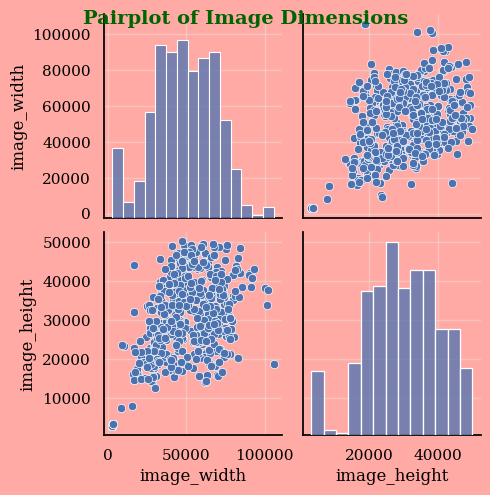

In [ ]:
sns.pairplot(train_df[['image_width', 'image_height']])
plt.suptitle('Pairplot of Image Dimensions', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Pairplot of Image Dimensions.png')
plt.show()

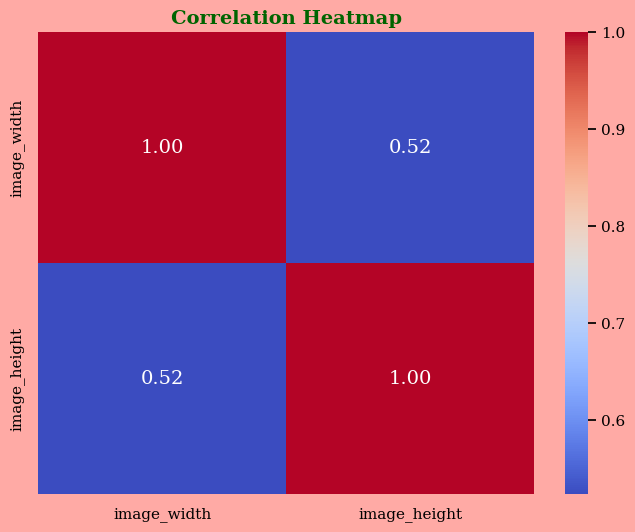

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Correlation Heatmap.png')
plt.show()

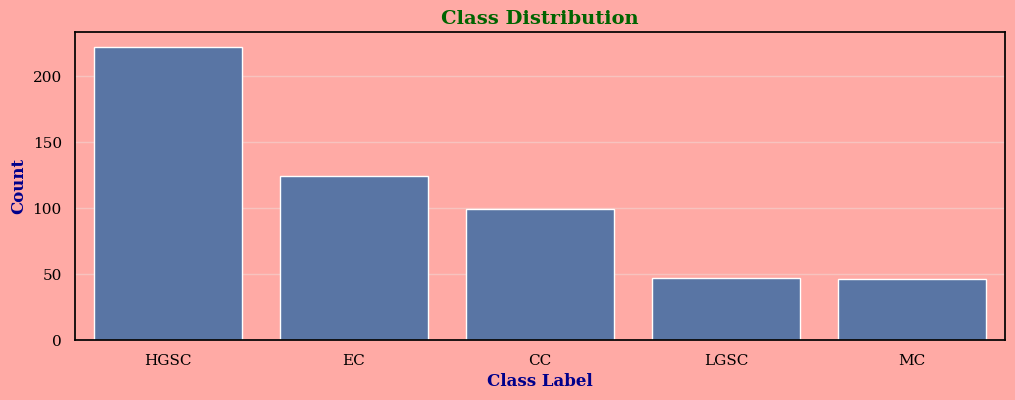

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Class Label', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkblue')
plt.savefig('Class Distribution.png')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('train.csv')
x = df.iloc[:,0:4].values
y = df.iloc[:,0:1].values
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [ ]:
print(f"val_y shape: {val_y.shape}")
print(f"train_x shape: {train_x.shape}")

val_y shape: (135, 1)
train_x shape: (403, 4)


In [ ]:

import pandas as pd

df=pd.read_csv('train.csv')
df

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [ ]:
is_tma_df=df[df['is_tma']]
is_tma_df

,image_id,label,image_width,image_height,is_tma
2,91,HGSC,3388,3388,True
37,4134,MC,2964,2964,True
76,8280,HGSC,2964,2964,True
83,9200,MC,3388,3388,True
112,13568,LGSC,2964,2964,True
149,17637,HGSC,2964,2964,True
176,21020,MC,3388,3388,True
236,29084,LGSC,3388,3388,True
263,31594,EC,3388,3388,True
288,35565,MC,2964,2964,True


In [ ]:
is_not_tma_df=df[df['is_tma']==False]
is_not_tma_df

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
5,431,HGSC,39991,40943,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [ ]:
train_df_tma = train_df[train_df['is_tma']==True]

In [ ]:
train_df_no_tma = train_df[train_df['is_tma']==False]
train_df_no_tma

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
5,431,HGSC,39991,40943,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [ ]:
train_df_no_tma['image_id_path'] = [f"{i}_thumbnail.png" for i in train_df_no_tma['image_id']]

In [ ]:
train_df_no_tma

,image_id,label,image_width,image_height,is_tma,image_id_path
0,4,HGSC,23785,20008,False,4_thumbnail.png
1,66,LGSC,48871,48195,False,66_thumbnail.png
3,281,LGSC,42309,15545,False,281_thumbnail.png
4,286,EC,37204,30020,False,286_thumbnail.png
5,431,HGSC,39991,40943,False,431_thumbnail.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,65022_thumbnail.png
534,65094,MC,55042,45080,False,65094_thumbnail.png
535,65300,HGSC,75860,27503,False,65300_thumbnail.png
536,65371,HGSC,42551,41800,False,65371_thumbnail.png


In [ ]:
train_df_tma['image_id_path'] = [f"{i}.png" for i in train_df_tma['image_id']]

In [ ]:
train_df_tma

,image_id,label,image_width,image_height,is_tma,image_id_path
2,91,HGSC,3388,3388,True,91.png
37,4134,MC,2964,2964,True,4134.png
76,8280,HGSC,2964,2964,True,8280.png
83,9200,MC,3388,3388,True,9200.png
112,13568,LGSC,2964,2964,True,13568.png
149,17637,HGSC,2964,2964,True,17637.png
176,21020,MC,3388,3388,True,21020.png
236,29084,LGSC,3388,3388,True,29084.png
263,31594,EC,3388,3388,True,31594.png
288,35565,MC,2964,2964,True,35565.png


In [ ]:
s=224

In [ ]:
import os
from PIL import Image
import numpy as np

image_data = []
image_label = []
path = "C:/Users/Roopi/OneDrive/Desktop/project 2nd trimester/Folders to be uploaded in collab/train_thumbnails"

for img, label in zip(train_df_no_tma['image_id_path'], train_df_no_tma['label']):
    image = Image.open(os.path.join(path, img))  # Corrected path concatenation using os.path.join
    image = image.resize((s, s))  # Assuming 's' is defined elsewhere in your code
    image = image.convert("RGB")
    image = np.array(image)
    image_data.append(image)
    image_label.append(label)


In [ ]:
print(len(image_data))
print(len(image_label))

513
513


In [ ]:
set(image_label)

{'CC', 'EC', 'HGSC', 'LGSC', 'MC'}

In [ ]:
image_label_1 = []
for i in image_label:
    if i=="CC":
        image_label_1.append(0)
    elif i=="EC":
        image_label_1.append(1)
    elif i=="HGSC":
        image_label_1.append(2)
    elif i=="LGSC":
        image_label_1.append(3)
    elif i=="MC":
        image_label_1.append(4)

In [ ]:
set(image_label_1)

{0, 1, 2, 3, 4}

In [ ]:
len(image_label_1)

513

In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check if image_data and image_label_1 are empty or None
if image_data is None or len(image_data) == 0 or image_label_1 is None or len(image_label_1) == 0:
    raise ValueError("image_data or image_label_1 is empty or None. Please check your data.")

# Convert to numpy arrays
x = np.array(image_data)
y = np.array(image_label_1)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# Check the shapes of the train and test sets
print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (410, 224, 224, 3)
X_test shape: (103, 224, 224, 3)
y_train shape: (410,)
y_test shape: (103,)


In [ ]:
x_train

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [ ]:
y_train

array([4, 3, 2, 2, 1, 2, 4, 1, 2, 0, 0, 4, 1, 1, 1, 2, 1, 2, 2, 4, 4, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 3, 2, 0, 4, 2, 1, 2, 2, 2, 1, 1, 2, 0,
       2, 3, 1, 1, 0, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1,
       2, 4, 1, 3, 4, 1, 0, 3, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       3, 1, 2, 4, 2, 0, 3, 1, 2, 1, 2, 2, 4, 2, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 4, 0, 3, 2, 0, 1, 2, 2, 3,
       1, 1, 0, 0, 3, 0, 3, 3, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2,
       4, 2, 2, 1, 2, 3, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 2,
       1, 4, 3, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 3, 1, 0, 2, 2, 4, 1, 1, 2,
       1, 3, 2, 0, 1, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 4, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 2, 0, 2, 3, 1, 3, 2, 1, 0, 2, 2, 3,
       2, 0, 2, 0, 4, 2, 0, 1, 1, 4, 2, 2, 4, 2, 4, 0, 1, 0, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,

**SAMPLE IMAGES**

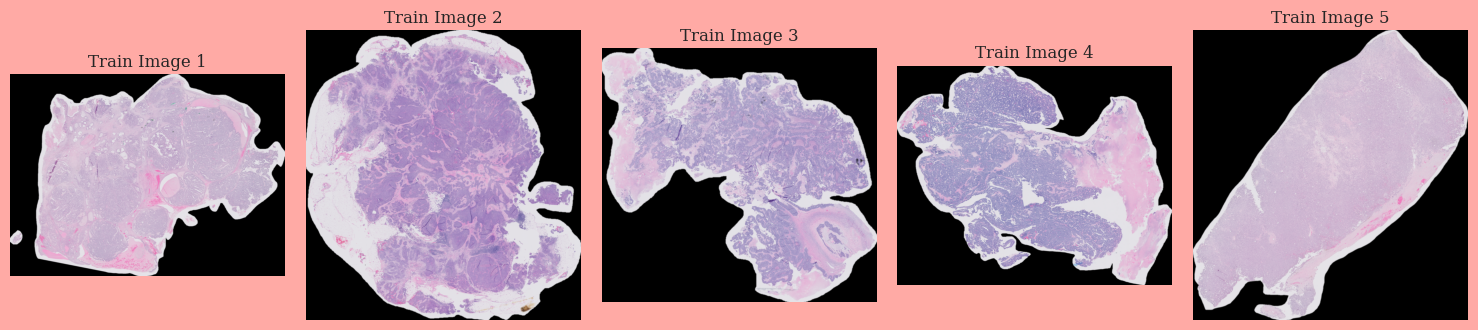

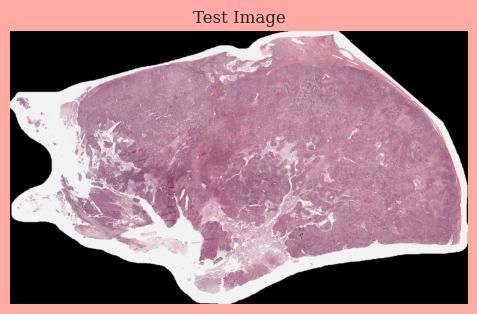

In [ ]:
import glob
from matplotlib import pyplot as plt
from matplotlib.image import imread

# Define the paths to the image directories thumbnails
train_data = glob.glob('C:/Users/Roopi/OneDrive/Desktop/project 2nd trimester/Folders to be uploaded in collab/train_thumbnails/*.png')  # Use wildcard pattern to match PNG files
test_data = glob.glob('C:/Users/Roopi/OneDrive/Desktop/project 2nd trimester/Folders to be uploaded in collab/test_thumbnails/*.png')

# Display a few sample images from the training set
num_samples = 5

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, image_path in enumerate(train_data[:num_samples]):
    img = imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Train Image {i+1}')

plt.tight_layout()
plt.savefig('Train Image.png')
plt.show()

# Display the one image from the testing set
fig, axes = plt.subplots(1, 1, figsize=(5, 5))  # Only one plot

# Check if there's at least one image in the test set
if len(test_data) > 0:
    img = imread(test_data[0])
    axes.imshow(img)
    axes.axis('off')
    axes.set_title('Test Image')

plt.tight_layout()
plt.savefig('Test Image.png')
plt.show()


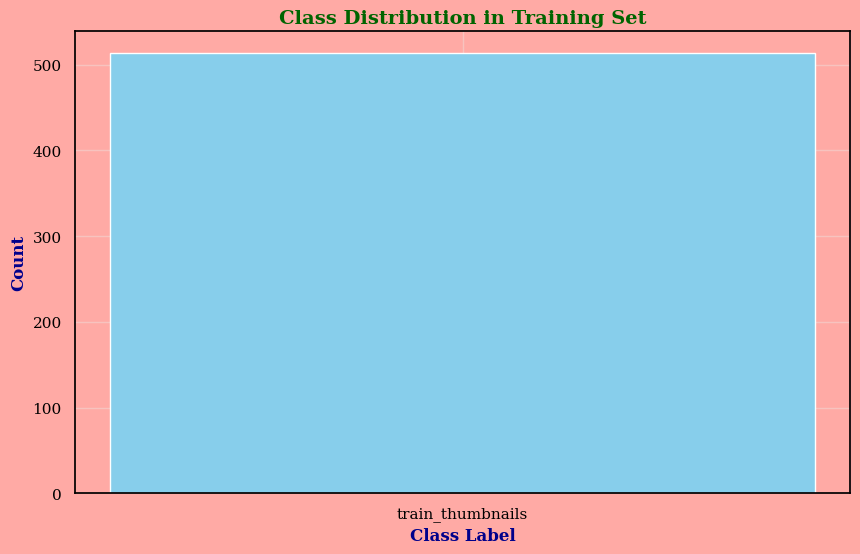

In [ ]:
import os
import matplotlib.pyplot as plt

# Count the number of images for each class in the training set
class_counts = {}
for image_path in train_data:
    class_name = os.path.basename(os.path.dirname(image_path))
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Create a bar plot for class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution in Training Set', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Class Label', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Class Distribution in Training Set.png')
plt.show()

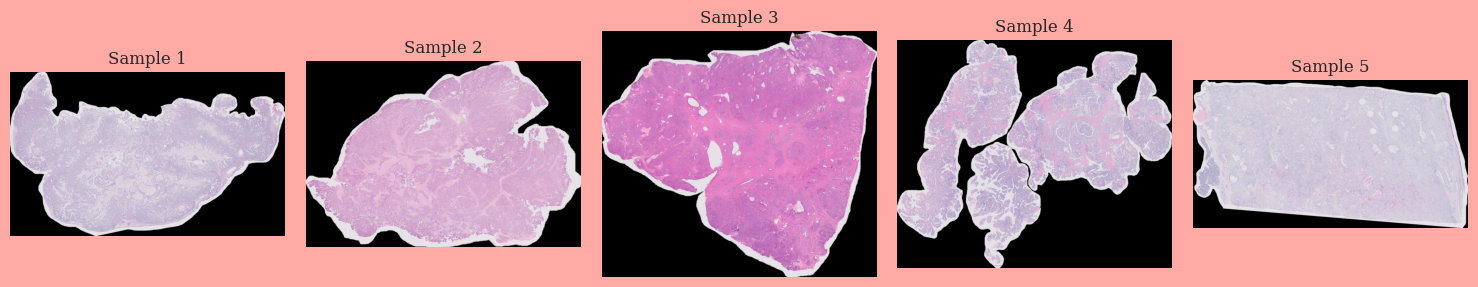

In [ ]:
from PIL import Image
import random

# Define the number of sample images to display
num_samples = 5

# Randomly select sample images from the training set
sample_images = random.sample(train_data, num_samples)

# Display the sample images
plt.figure(figsize=(15, 8))
for i, image_path in enumerate(sample_images, 1):
    image = Image.open(image_path)
    plt.subplot(1, num_samples, i)
    plt.imshow(image)
    plt.title(f'Sample {i}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('samples.png')
plt.show()

**BUILDING CNN MODEL**
Convolutional Neural Network (CNN) model using the Keras Sequential API.

In [ ]:
!python.exe -m pip install --upgrade pip --user --no-warn-script-location



In [ ]:
!python.exe -m pip install tensorflow


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your CNN model
KerasModel = Sequential([
    Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(s, s, 3)),
    Conv2D(150, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(120, kernel_size=(3, 3), activation='relu'),
    Conv2D(80, kernel_size=(3, 3), activation='relu'),
    Conv2D(50, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dropout(rate=0.2),
    Dense(5, activation='softmax')
])


In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 200)       │           5,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 150)       │         270,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 150)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 120)       │         162,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 80)        │          86,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 104, 104, 50)        │          36,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 52, 52, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 135200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 120)                 │      16,224,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          12,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,801,925 (64.09 MB)

 Trainable params: 16,801,925 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
epochs = 10
ThisModel = KerasModel.fit(x_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 697s 106s/step - accuracy: 0.2386 - loss: 88.2497
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 496s 68s/step - accuracy: 0.2802 - loss: 7.5166
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 562s 80s/step - accuracy: 0.4356 - loss: 1.4506
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 514s 72s/step - accuracy: 0.5402 - loss: 1.2472
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 446s 62s/step - accuracy: 0.6488 - loss: 0.9606
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 364s 52s/step - accuracy: 0.7981 - loss: 0.5522
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 453s 66s/step - accuracy: 0.9004 - loss: 0.2574
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 529s 75s/step - accuracy: 0.9564 - loss: 0.1156
Epoch 9/10
3/7 ━━━━━━━━━━━━━━━━━━━━ 6:19 95s/step - accuracy: 0.9731 - loss: 0.0756

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4035 - loss: 3.6270
Test Loss is 3.612159013748169
Test Accuracy is 0.3786407709121704


In [ ]:
#vcg16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming you have 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Assuming you have already split your dataset into training and testing sets (x_train, y_train, x_test, y_test)

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.2856 - loss: 43.6316 - val_accuracy: 0.2195 - val_loss: 27.3038
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.5616 - loss: 12.4064 - val_accuracy: 0.3780 - val_loss: 10.7575
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.6602 - loss: 3.6178 - val_accuracy: 0.2805 - val_loss: 3.6433
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.6882 - loss: 1.3763 - val_accuracy: 0.3171 - val_loss: 3.3078
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.7193 - loss: 0.9023 - val_accuracy: 0.2805 - val_loss: 2.6458
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.7252 - loss: 0.9575 - val_accuracy: 0.3293 - val_loss: 2.1423
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.7290 - loss: 0.8724 - val_accuracy: 0.3780 - val_loss: 2.5729
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.7510 - loss: 0.8355 - val_accuracy: 0.3902 - val_l

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4646 - loss: 3.0618
Test Loss: 2.9177567958831787
Test Accuracy: 0.42718446254730225


In [ ]:
pip install opencv-python



  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2350 - loss: 3.0262 - val_accuracy: 0.3786 - val_loss: 2.0748
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4166 - loss: 1.7602 - val_accuracy: 0.3301 - val_loss: 1.4791
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.4384 - loss: 1.3760 - val_accuracy: 0.4078 - val_loss: 1.4187
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.4870 - loss: 1.2239 - val_accuracy: 0.3883 - val_loss: 1.4088
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.5242 - loss: 1.1987 - val_accuracy: 0.4078 - val_loss: 1.4195
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5233 - loss: 1.1626 - val_accuracy: 0.4078 - val_loss: 1.3910
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5493 - loss: 1.0658 - val_accuracy: 0.4660 - val_loss: 1.3887
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5470 - loss: 1.0708 - val_accuracy: 0.4660 - val_loss: 1.3751
Epoch 9/

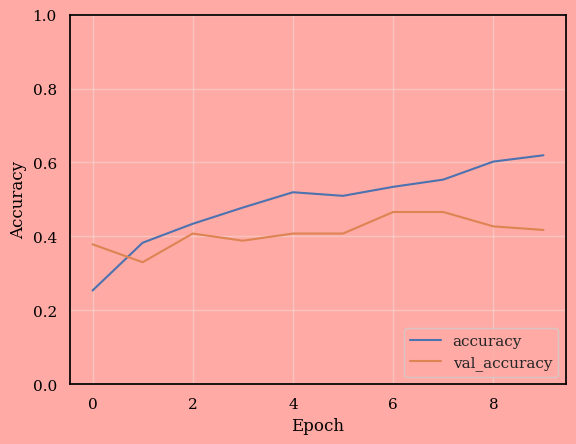

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Define the input size of the images
s = 224  # assuming you are using 224x224 images

# Load and preprocess the data
# Assuming x_train, x_test, y_train, y_test are already prepared

# Load the ResNet50 model pretrained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(s, s, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Define the number of epochs
epochs = 10

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
!git config --global user.name "Roopikaa"
!git config --global user.email "kroopikaa18@gmail,com"


In [3]:
!git clone https://github.com/Roopikaa/Ovarian-Cancer-Classification-Project

Cloning into 'Ovarian-Cancer-Classification-Project'...


In [4]:
!pwd



/content


In [5]:
!ls


Ovarian-Cancer-Classification-Project  sample_data


In [6]:
!find /content -name "Ovarian Cancer Classification Project Trimester-2.ipynb"


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!mv /content/drive/MyDrive/Colab Notebooks/Ovarian Cancer Classification Project Trimester-2.ipynb/* /content/Ovarian-Cancer-Classification-Project/


mv: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
mv: cannot stat 'Notebooks/Ovarian': No such file or directory
mv: cannot stat 'Cancer': No such file or directory
mv: cannot stat 'Classification': No such file or directory
mv: cannot stat 'Project': No such file or directory
mv: cannot stat 'Trimester-2.ipynb/*': No such file or directory
